# End to End X-Ray Classification using CNN

Libraries used:                                                          
    `numpy`                                                                 
    `pandas`                                                                
    `matplotlib`                                                               
    `seaborn`                                                                   
    `tensorflow`                                                               

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import tensorflow as tf
import cv2, os, gc, glob
from tqdm import tqdm
from tensorflow.keras import layers, models

import keras
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

In [37]:
dataset_dir="D:\Edge Download\CNN-Dataset\CNN-Dataset"

In [38]:
#ImgPP
imgpath=[]
for (dirnames, foldernames, filenames) in os.walk(dataset_dir): #get the full path name of a type of file into all subdirectories with walk
    print(dirnames,foldernames,filenames)
    for filename in filenames:
        if (filename[-3:]=='png'): #using list slicing we can fetch the last 'n' elements from list
            imgpath.append(os.path.join(dirnames, filename)) #os.path.join  combines one or more path names into a single path and then paths will be appended to list imgpath

D:\Edge Download\CNN-Dataset\CNN-Dataset ['COVID', 'Normal', 'Viral Pneumonia'] []
D:\Edge Download\CNN-Dataset\CNN-Dataset\COVID [] ['COVID-1.png', 'COVID-10.png', 'COVID-100.png', 'COVID-1000.png', 'COVID-1001.png', 'COVID-1002.png', 'COVID-1003.png', 'COVID-1004.png', 'COVID-1005.png', 'COVID-1006.png', 'COVID-1007.png', 'COVID-1008.png', 'COVID-1009.png', 'COVID-101.png', 'COVID-1010.png', 'COVID-1011.png', 'COVID-1012.png', 'COVID-1013.png', 'COVID-1014.png', 'COVID-1015.png', 'COVID-1016.png', 'COVID-1017.png', 'COVID-1018.png', 'COVID-1019.png', 'COVID-102.png', 'COVID-1020.png', 'COVID-1021.png', 'COVID-1022.png', 'COVID-1023.png', 'COVID-1024.png', 'COVID-1025.png', 'COVID-1026.png', 'COVID-1027.png', 'COVID-1028.png', 'COVID-1029.png', 'COVID-103.png', 'COVID-1030.png', 'COVID-1031.png', 'COVID-1032.png', 'COVID-1033.png', 'COVID-1034.png', 'COVID-1035.png', 'COVID-1036.png', 'COVID-1037.png', 'COVID-1038.png', 'COVID-1039.png', 'COVID-104.png', 'COVID-1040.png', 'COVID-1041.

In [39]:
data=[]
target=[]
resize=150

dic={'Viral Pneumonia': 'Pneumonia', 'Normal': 'Normal', 'COVID': 'Covid-19'} #dictionary to map file label name with target label name
     

In [40]:
for imgpaths in tqdm(imgpath):               #tqdm is used to make terminal progress bar
    label=imgpaths.split(os.path.sep)[-2]
    image=cv2.imread(imgpaths)
    image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    image=cv2.resize(image, (resize, resize)) /255 #resizing the image
    

    #updates the respective data and target label lists
    data.append(image)
    target.append(dic[label])

100%|█████████████████████████████████████████████████████████████████████████████| 9951/9951 [00:56<00:00, 174.92it/s]


In [44]:
print(len(data))

9951


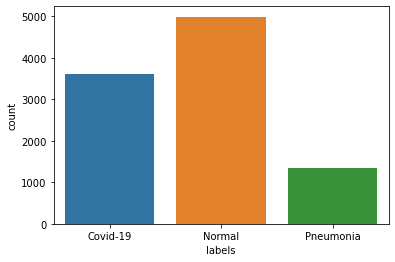

In [47]:
df=pd.DataFrame(target,columns=['labels'])
sns.countplot(x=df['labels'])
plt.show()

In [48]:
size=[]
for file in imgpath: #for loop to get image paths
    img=plt.imread(file) #used to read an image from a file into an array
    size.append(img.shape) #image.shape returns a tuple of the number of rows, columns, and channels (if the image is color).
pd.Series(size).value_counts() #it retures a series containing counts of unique values

(299, 299)       9811
(299, 299, 3)     140
dtype: int64

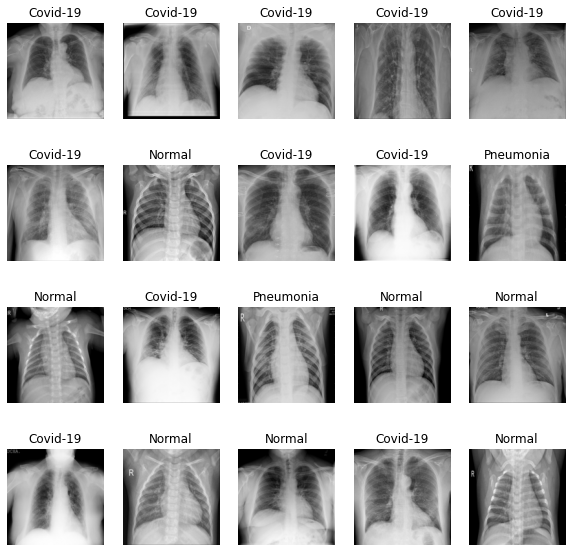

In [49]:
plt.figure(figsize=(10,10)) #to change the size of the images
for c , i in enumerate(list(np.random.randint(0,len(imgpath),20))) : #enumerate() to get a counter and the value from the iterable at the same time and random.randit() to generate randome images from image path
    plt.subplot(4,5,c+1)
    plt.imshow(data[i] , cmap='gray')
    plt.title(target[i])
    plt.axis('off')     
plt.show()

In [50]:
#encode labels as integer
le=LabelEncoder() #labelencoder used to normalize labels
labels=le.fit_transform(target) #also be used to transform non-numerical labels to numerical labels
labels=to_categorical(labels)

print(le.classes_)
print(labels[0])

['Covid-19' 'Normal' 'Pneumonia']
[1. 0. 0.]


In [51]:
#spliting data into training and testing (80-20 Ratio)

(trainX, testX, trainY, testY)=train_test_split(data, labels, test_size=0.20, stratify=labels, random_state=42)

trainX=np.array(trainX)
testX=np.array(testX)
trainY=np.array(trainY)
testY=np.array(testY)

print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(7960, 150, 150, 3)
(1991, 150, 150, 3)
(7960, 3)
(1991, 3)


In [52]:
trainX[0]

array([[[0.14901961, 0.14901961, 0.14901961],
        [0.16078431, 0.16078431, 0.16078431],
        [0.19215686, 0.19215686, 0.19215686],
        ...,
        [0.4       , 0.4       , 0.4       ],
        [0.38823529, 0.38823529, 0.38823529],
        [0.61960784, 0.61960784, 0.61960784]],

       [[0.25490196, 0.25490196, 0.25490196],
        [0.27843137, 0.27843137, 0.27843137],
        [0.28627451, 0.28627451, 0.28627451],
        ...,
        [0.63137255, 0.63137255, 0.63137255],
        [0.60392157, 0.60392157, 0.60392157],
        [0.67843137, 0.67843137, 0.67843137]],

       [[0.29019608, 0.29019608, 0.29019608],
        [0.34117647, 0.34117647, 0.34117647],
        [0.37254902, 0.37254902, 0.37254902],
        ...,
        [0.43921569, 0.43921569, 0.43921569],
        [0.63529412, 0.63529412, 0.63529412],
        [0.83921569, 0.83921569, 0.83921569]],

       ...,

       [[0.79607843, 0.79607843, 0.79607843],
        [0.8       , 0.8       , 0.8       ],
        [0.78823529, 0

In [53]:
from tensorflow.keras import backend as K
K.clear_session()

In [54]:
#CNN Model
s=150
model=Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape=(s,s,3), kernel_initializer='he_normal'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2), strides=(1,1)))

model.add(Dropout(0.25))

#fully connected
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(3, activation="softmax"))

In [55]:
#compile
model.compile(optimizer=Adam(), loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [92]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 33, 33, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 33, 33, 128)       0

In [57]:
data=[]

In [58]:
imgpath=[]

In [59]:
df=[]

In [60]:
size=[]

In [61]:
epochs=20
batch_size=64

ThisModel=model.fit(trainX, trainY, batch_size, steps_per_epoch=len(trainX) // batch_size, validation_data=(testX, testY), validation_steps=len(testX) // batch_size, epochs=epochs, verbose=1)

Epoch 1/20
124/124 [==============================] - 165s 1s/step - loss: 0.8783 - accuracy: 0.7576 - val_loss: 0.3289 - val_accuracy: 0.8715
Epoch 2/20
124/124 [==============================] - 152s 1s/step - loss: 0.3225 - accuracy: 0.8732 - val_loss: 0.2546 - val_accuracy: 0.9073
Epoch 3/20
124/124 [==============================] - 148s 1s/step - loss: 0.2450 - accuracy: 0.9078 - val_loss: 0.2314 - val_accuracy: 0.9209
Epoch 4/20
124/124 [==============================] - 149s 1s/step - loss: 0.2155 - accuracy: 0.9158 - val_loss: 0.2256 - val_accuracy: 0.9279
Epoch 5/20
124/124 [==============================] - 149s 1s/step - loss: 0.1672 - accuracy: 0.9372 - val_loss: 0.2063 - val_accuracy: 0.9224
Epoch 6/20
124/124 [==============================] - 149s 1s/step - loss: 0.1387 - accuracy: 0.9507 - val_loss: 0.1857 - val_accuracy: 0.9375
Epoch 7/20
124/124 [==============================] - 146s 1s/step - loss: 0.1079 - accuracy: 0.9620 - val_loss: 0.1917 - val_accuracy: 0.9375

In [98]:
model.save('D:\X-Ray-Classification/CNN_Model.hdf5')

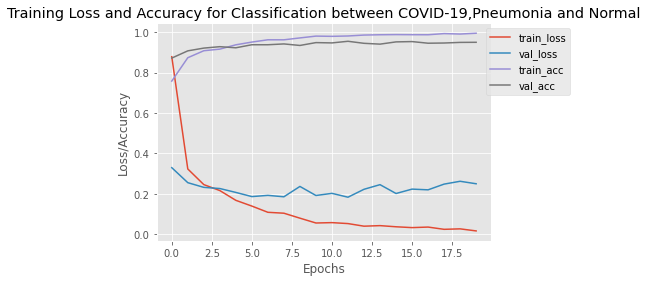

In [67]:
#loss/accuracy graph
n=epochs
plt.style.use('ggplot')
plt.figure()
plt.plot(np.arange(0, n), ThisModel.history["loss"], label="train_loss")
plt.plot(np.arange(0, n), ThisModel.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, n), ThisModel.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, n), ThisModel.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy for Classification between COVID-19,Pneumonia and Normal")
plt.xlabel("Epochs")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right", bbox_to_anchor=(1.25, 1))
plt.savefig("plot.png")

In [69]:
#to check test accuacy
modelLoss, modelAccuracy=model.evaluate(testX, testY, verbose=0)

print('Test Loss: {}'.format(modelLoss))
print('Test Accuracy: {}'.format(modelAccuracy ))
     

Test Loss: 0.2503359615802765
Test Accuracy: 0.9492717385292053


 Training Accuracy : 0.9492*100 = 94.92%

In [70]:
modelLoss=[]
modelAccuracy=[]

In [71]:
#classification report on train
predIdxs = model.predict (trainX, batch_size=64)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(trainY.argmax(axis=1), predIdxs, target_names=le.classes_, digits=3))

              precision    recall  f1-score   support

    Covid-19      0.999     0.999     0.999      2892
      Normal      0.999     0.999     0.999      3992
   Pneumonia      0.999     0.999     0.999      1076

    accuracy                          0.999      7960
   macro avg      0.999     0.999     0.999      7960
weighted avg      0.999     0.999     0.999      7960



In [72]:
#classification report on test
predIdxs=model.predict(testX, batch_size=64)
predIdxs=np.argmax(predIdxs, axis=1)
print(classification_report(testY.argmax(axis=1), predIdxs, target_names=le.classes_, digits=3))

              precision    recall  f1-score   support

    Covid-19      0.944     0.952     0.948       724
      Normal      0.953     0.955     0.954       998
   Pneumonia      0.950     0.922     0.936       269

    accuracy                          0.949      1991
   macro avg      0.949     0.943     0.946      1991
weighted avg      0.949     0.949     0.949      1991



In [73]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusionmatrix=confusion_matrix(testY.argmax(axis=1), predIdxs)
print(confusionmatrix)

[[689  32   3]
 [ 35 953  10]
 [  6  15 248]]


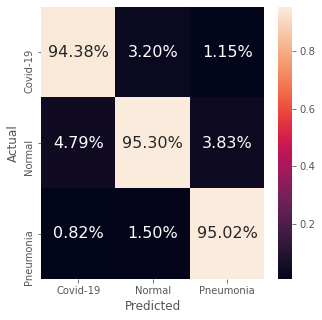

In [74]:
#heatmap
df_cm=pd.DataFrame(confusionmatrix, columns=le.classes_, index=le.classes_)
df_cm.index.name='Actual'
df_cm.columns.name='Predicted'
plt.figure(figsize=(5,5))
sns.heatmap(df_cm/np.sum(df_cm), fmt='.2%', annot=True, annot_kws={'size':16})
plt.show()

## Predicting Output

In [75]:
#loading the model
from tensorflow import keras
model=keras.models.load_model('D:\X-Ray-Classification/CNN_Model.h5')

In [76]:
from numpy import asarray
from PIL import Image
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2

In [82]:
covid_img_path="D:/Edge Download/CNN-Dataset/CNN-Dataset/COVID/COVID-19.png"
normal_img_path="D:/Edge Download/CNN-Dataset/CNN-Dataset/Normal/Normal-500.png"
pneumonia_img_path="D:/Edge Download/CNN-Dataset/CNN-Dataset/Viral Pneumonia/Viral Pneumonia-1000.png"

img_paths=[covid_img_path, normal_img_path, pneumonia_img_path]

In [83]:
print(img_paths)

['D:/Edge Download/CNN-Dataset/CNN-Dataset/COVID/COVID-19.png', 'D:/Edge Download/CNN-Dataset/CNN-Dataset/Normal/Normal-500.png', 'D:/Edge Download/CNN-Dataset/CNN-Dataset/Viral Pneumonia/Viral Pneumonia-1000.png']


In [85]:
#preprocessing the image
resize=150

images=[]

for img_path in img_paths:
  img_path=cv2.imread(img_path)
  img_path=cv2.cvtColor(img_path, cv2.COLOR_BGR2RGB) 
  img_path=cv2.resize(img_path, (resize, resize)) /255
  images.append(img_path)

In [86]:
#printing image shape
count=0
for _ in images:
  images[count]=np.array(images[count])
  images[count]=np.expand_dims(images[count], axis=0)
  print(images[count].shape)
  count+=1

(1, 150, 150, 3)
(1, 150, 150, 3)
(1, 150, 150, 3)


In [87]:
#prediction
prediction=[]
for i in images:
  prediction.append(model.predict(i))

In [88]:
#output of prediction
output=[]
for p in prediction:
  output.append(np.argmax(p,axis=1))
     

In [89]:
#0: COVID-19
#1: Normal
#2: Pneumonia
title=[]
for out in output:
  if out==0:
    title.append('COVID-19')
  elif out==1:
    title.append('Normal')
  else:
    title.append('Pneumonia')

print(title)

['COVID-19', 'Normal', 'Pneumonia']


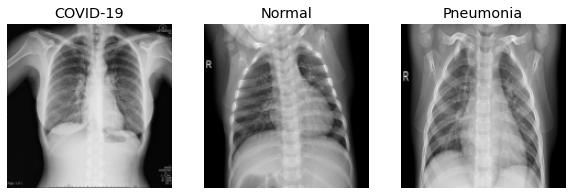

In [90]:
#printing the images with predicted output
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

i=0

for img in images:
  plt.subplot(1,3,i+1)
  plt.imshow(np.squeeze(img) , cmap='gray')
  plt.title(title[i])
  plt.axis('off')  
  i+=1   
plt.show()